# MENA Devs Survey (2017) Analysis
## Second Draft -- October 2017

### Abstract
This is a draft and a work in progress. Treat it and the results as such.

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# General configuration
sns.set(font_scale=1.4)

# plt.style.use('ggplot')
%matplotlib inline

### Read Data from the CSV file

```
current directory: <main project folder>/analysis/
data location: <main project folder>/raw_data/
```

In [122]:
raw_data_file = "../raw_data/MD_Survey-29062017.csv"
data = pd.read_csv(raw_data_file, sep=",", index_col=0)

In [123]:
data.head()

,age_group,gender,self_identification,occupation,in_lebanon,experience_range,salary_range,skills,employment_status,company_size,job_satisfaction,employment_interest,education_level,learning_channels,md_usefulness,startup_interest,jobboard_interest,OS
ID,,,,,,,,,,,,,,,,,,
1,31 - 40,Male,"Software Engineer,Software Developer,,,,,Team ...",Technical Manager,1,11+,80000-90000,"SQL,,,,,,,,,,Java,,, Python,, C#,,,,,,,,,,Post...",Employed Full-Time,61 - 100 people,4,0,University Degree,"Technical Articles,,,,,,Books,,,Online Videos,,,,",5,0,0,macOS
2,25 - 30,I prefer not to share,"Software Engineer,,,,,,Team Leader,,,,,,,,,,,,...",Quality engineer,0,6-10,50000-60000,",,,,,,,,,,,,, Python,,,,,,,,,,,,,MySQL,,,git,,...",Employed Full-Time,more than 1000 people,11,0,Masters Degree,"Technical Articles,,,,,,,,,,,,,",6,0,0,Linux
3,25 - 30,Male,"Software Engineer,,Back-End Developer,,,,Team ...",Technical Director,1,11+,50000-60000,"SQL,,,,,,,JavaScript,,Arduino / Raspberry Pi,J...",Employed Full-Time,5 - 9 people,10,0,High School Degree,"Technical Articles,Academic Publications,MENA ...",6,0,2,macOS
4,25 - 30,Male,",Software Developer,Back-End Developer,Front-E...",Trainer/Teacher,1,11+,10000,"SQL,,,,,,,JavaScript,,,,,PHP, Python, SQL Serv...",Employed Full-Time,5 - 9 people,11,0,Masters Degree,"Technical Articles,Academic Publications,,,,,,...",3,1,3,Linux
5,31 - 40,Male,"Software Engineer,Software Developer,Back-End ...",Software Engineer,1,6-10,40000-50000,"SQL,,,,,,,JavaScript,,,,,PHP,, SQL Server, C#,...",Employed Full-Time,101 - 500 people,11,0,Masters Degree,"Technical Articles,,MENA Devs Chats,Meetups,Co...",7,1,2,macOS


### Data Cleanup

#### Cleanup and reorganization into a new data frame

In [124]:
# Restrict the data to professionals residing in Lebanon only
data = data[data['in_lebanon'] == 1]

In [125]:
print("Population Size: {}".format(len(data)))

Population Size: 99


### Gender Analysis

In [126]:
gender_data = pd.DataFrame(data['gender'].value_counts())
x_values = gender_data.index
y_values = data['gender'].value_counts()
gender_data

,gender
Male,89
Female,7
I prefer not to share,2
Other,1


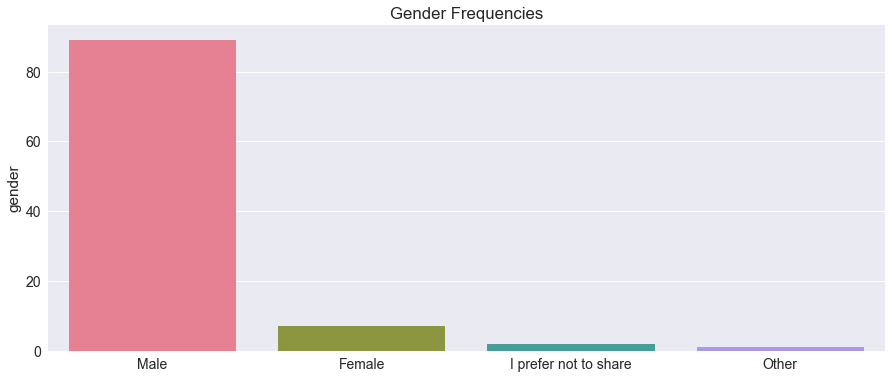

In [127]:
# Plot
plt.figure(figsize=(15,6))
sns.barplot(x_values, y_values, palette="husl")
plt.title("Gender Frequencies")

In [128]:
male_occupations = data[data['gender'] == 'Male']['occupation'].value_counts()
female_occupations = data[data['gender'] == 'Female']['occupation'].value_counts()

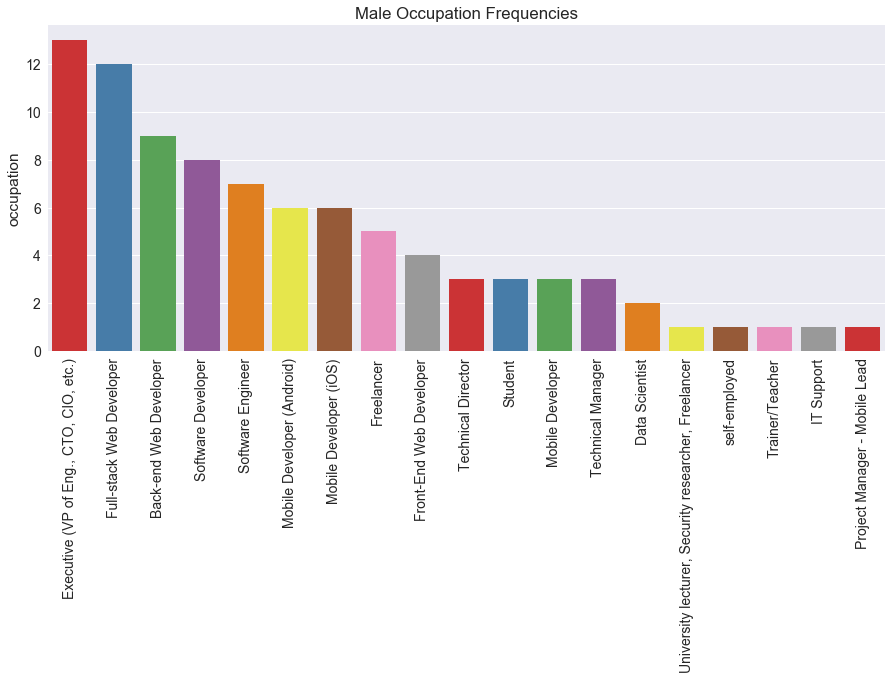

In [129]:
# Plotting The "MALE" Occupations
plt.figure(figsize=(15,6))
sns.barplot(male_occupations.index.values, male_occupations, palette="Set1")
plt.xticks(rotation=90)
plt.title("Male Occupation Frequencies")

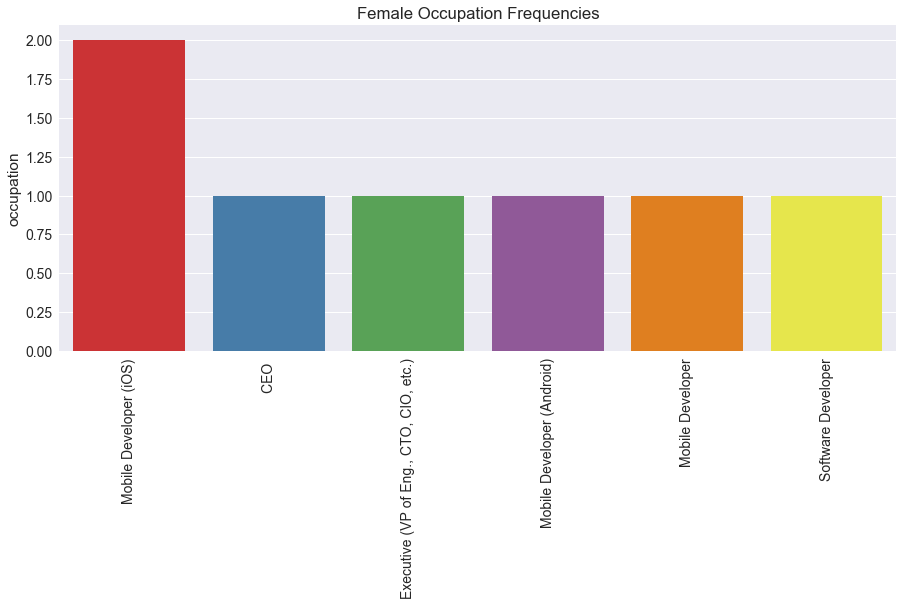

In [132]:
# Plotting The "FEMALE" Occupations
plt.figure(figsize=(15,6))
sns.barplot(female_occupations.index.values, female_occupations, palette="Set1")
plt.xticks(rotation=90)
plt.title("Female Occupation Frequencies")